<a href="https://colab.research.google.com/github/semaozkir/Intro-to-AI/blob/main/Cardiovascular_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES



In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

IMPORTING DATASET

In [ ]:
df = pd.read_csv("cardiotrain.csv")

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

PLOTTING THE DATASET

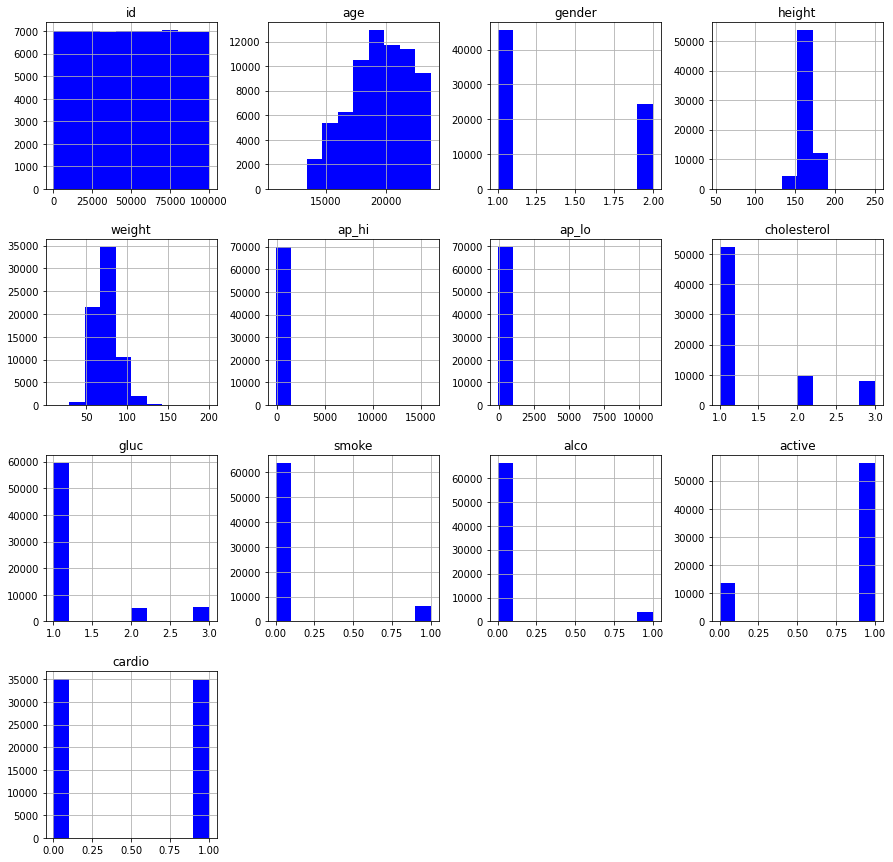

In [ ]:
df.hist(figsize = (15, 15),color = 'blue')
plt.show()

 Scattering the Plots

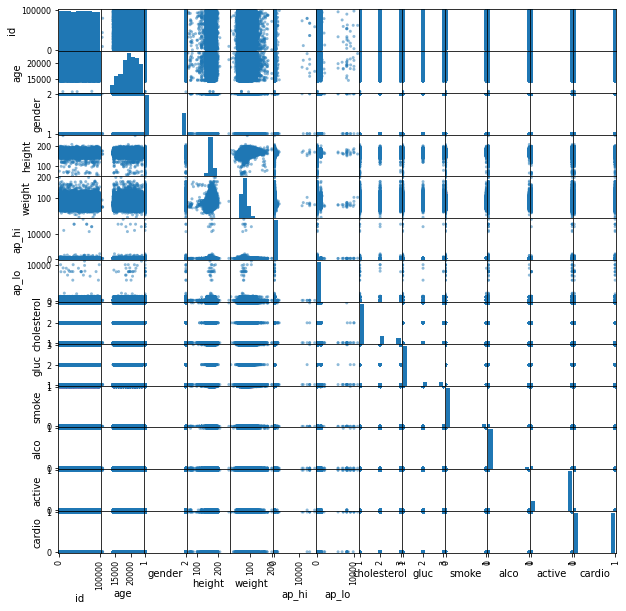

In [ ]:
scatter_matrix(df, figsize = (10, 10))
plt.show()

Correlation

In [ ]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


Correlation Matrix Visualization

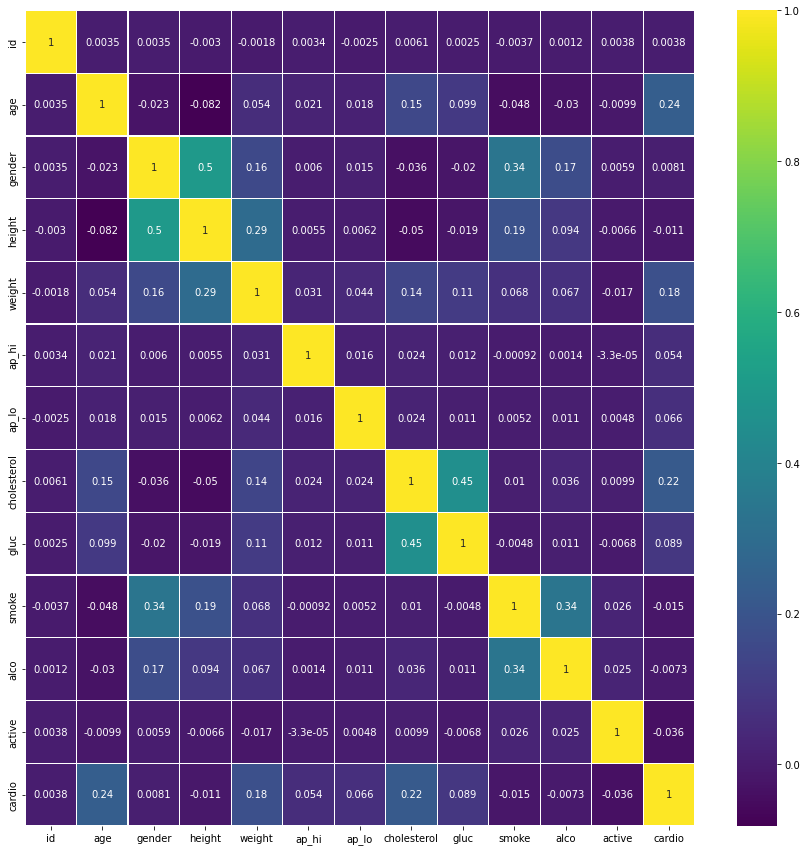

In [ ]:
corrmat = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corrmat, cmap = 'viridis', annot = True, linewidths = '.25')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


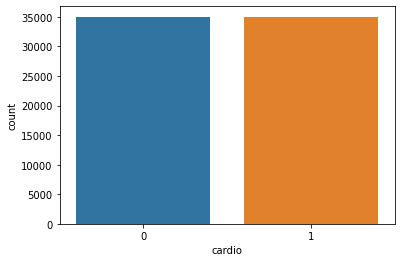

In [ ]:
sns.countplot(df['cardio'])

Visualizing each Columns with the Output Column

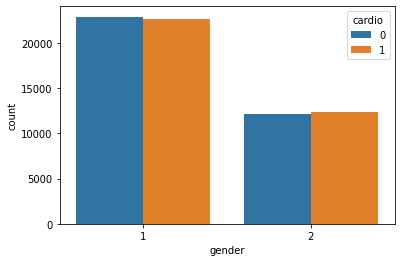

In [ ]:
sns.countplot(data=df, x="gender", hue="cardio")

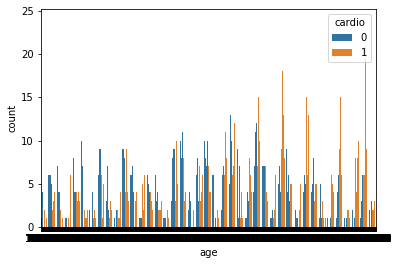

In [ ]:
sns.countplot(data = df, x = 'age', hue = 'cardio')

In [ ]:
df['new_age'] = (df['age']/365).round(0)
df['new_age']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: new_age, Length: 70000, dtype: float64

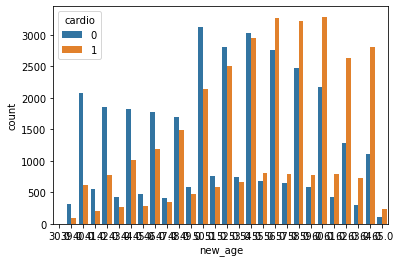

In [ ]:
sns.countplot(data = df, x = df['new_age'], hue = 'cardio')


In [ ]:
df.drop(['new_age'], axis = 'columns')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Dividing Features and Label Comuns

In [ ]:
x = df.drop(['cardio', 'id'], axis = 'columns')
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [ ]:
y = df['cardio']
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

Dividing into Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .30, random_state = 1)
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,16136,2,169,71.0,100,80,1,1,1,0,1
34858,14615,1,158,69.0,140,80,2,1,0,0,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1
59230,16720,1,153,53.0,100,60,1,1,0,0,1
1730,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


In [ ]:
ytrain

23561    0
34858    1
54953    0
59230    0
1730     1
        ..
49100    1
20609    0
21440    0
50057    1
5192     1
Name: cardio, Length: 49000, dtype: int64

MODEL DEVELOPING USING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [ ]:
pred = rfc.predict(xtest)


KeyboardInterrupt: ignored

In [ ]:
rfc.score(xtest, ytest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print (cm)

Visualization of the Confusion Matrix

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
pred = rfc.predict(xtrain)

In [ ]:
rfc.score(xtrain, ytrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print (cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'OrRd', fmt = 'g')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

MODEL DEVELOPING USING DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)

In [ ]:
pred = dtc.predict(xtest)

In [ ]:
dtc.score(xtest, ytest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
pred = dtc.predict(xtrain)

In [ ]:
dtc.score(xtrain, ytrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

MODEL DEVELOPING USING SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(xtrain, ytrain)

In [ ]:
svm.score(xtest, ytest)

In [ ]:
pred = svm.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBuGn', fmt = 'g')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
svm.score(xtrain, ytrain)

In [ ]:
pred = svm.predict(xtrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBuGn', fmt = 'g')
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

MODEL DEVELOPING USING LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

In [ ]:
lr.score(xtest, ytest)

In [ ]:
pred = lr.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
lr.score(xtrain, ytrain)

In [ ]:
pred = lr.predict(xtrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

GAUSSIAN NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

In [ ]:
gnb.score(xtest, ytest)

In [ ]:
pred = gnb.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
gnb.score(xtrain, ytrain)

In [ ]:
pred = gnb.predict(xtrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

K-NEAREST NEIGHBORS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

In [ ]:
knn.score(xtest, ytest)

In [ ]:
pred = knn.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)


In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
knn.score(xtrain, ytrain)

In [ ]:
pred = knn.predict(xtrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

LINEAR DISCRIMINANT ANALYSIS

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain, ytrain)

In [ ]:
lda.score(xtest, ytest)

In [ ]:
pred = lda.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix for Linear Discriminant Analysis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
x = np.array(["RF", "DT", "SVM", "LR", "GNB", "KNN", "LDA"])
y = np.array([72.04, 63.3, 60.1, 70.4, 59.1, 68.2, 64.6])
colors_list = ['Green','Orange', 'Blue', 'Purple', 'Black', 'Brown', 'Olive']
plt.xlabel('Name of the Algorithms', fontname="Bookman Old Style", fontsize=18)
plt.title('Algorithm Comparison', fontname="Bookman Old Style", fontsize=18)
plt.ylabel('Accuracy (%)', fontname="Bookman Old Style", fontsize=18)
pb = plt.bar(x, y, color = colors_list)
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = "center", va = "bottom", fontname="Bookman Old Style", fontsize = 12)

plt.show()

BERNOULLI NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(xtrain, ytrain)

In [ ]:
bnb.score(xtest, ytest)

In [ ]:
pred = bnb.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBu', fmt = 'g')
plt.title('Confusion Matrix Bernoulli NB')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
bnb.score(xtrain, ytrain)

In [ ]:
pred = bnb.predict(xtrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBu', fmt = 'g')
plt.title('Confusion Matrix Bernoulli NB')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

GRADIENT BOOSTING


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [ ]:
gbc.score(xtest, ytest)

0.7352380952380952

In [ ]:
pred = gbc.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.78      0.74     10352
           1       0.77      0.69      0.72     10648

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.73     21000
weighted avg       0.74      0.74      0.73     21000



In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

[[8111 2241]
 [3319 7329]]


Text(33.0, 0.5, 'Actual Label')

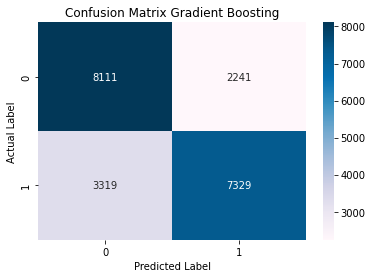

In [ ]:
 p= sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBu', fmt = 'g')
plt.title('Confusion Matrix Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
gbc.score(xtrain, ytrain)

0.7399183673469387

In [ ]:
pred = gbc.predict(xtrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.72      0.79      0.75     24669
           1       0.76      0.69      0.73     24331

    accuracy                           0.74     49000
   macro avg       0.74      0.74      0.74     49000
weighted avg       0.74      0.74      0.74     49000



In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

[[19411  5258]
 [ 7486 16845]]


Text(33.0, 0.5, 'Actual Label')

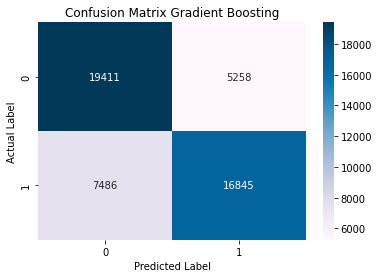

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBu', fmt = 'g')
plt.title('Confusion Matrix Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

XG BOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(xtrain,ytrain)

In [ ]:
xgb_classifier.score(xtest, ytest)

In [ ]:
pred = xgb_classifier.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix XG BOOST')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
xgb_classifier.score(xtrain, ytrain)

In [ ]:
pred = xgb_classifier.predict(xtrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGn', fmt = 'g')
plt.title('Confusion Matrix XG BOOST')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

MLP MULTILAYER PERCEPTRON

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(xtrain, ytrain)

In [ ]:
mlp.score(xtest, ytest)

In [ ]:
pred = mlp.predict(xtest)

In [ ]:
cr = classification_report(ytest, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytest, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBuGn', fmt = 'g')
plt.title('Confusion Matrix For MLP')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
mlp.score(xtrain, ytrain)

In [ ]:
pred = mlp.predict(xtrain)

In [ ]:
cr = classification_report(ytrain, pred)
print(cr)

In [ ]:
cm = confusion_matrix(ytrain, pred)
print(cm)

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'PuBuGn', fmt = 'g')
plt.title('Confusion Matrix For MLP')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# **GRIDSEARCH** **CV**

RANDOM FOREST

In [ ]:
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas_profiling as pp

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

In [ ]:
from warnings import simplefilter

In [ ]:
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
target_name = 'cardio'
df_target = df[target_name]
df = df.drop([target_name], axis=1)

In [ ]:
train, test, target, target_test = train_test_split(df, df_target, test_size=0.2, random_state=0)

In [ ]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

In [ ]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

K NEAREST NEIGHBORS ----KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

In [ ]:
knn_params = {'n_neighbors': np.arange(1, 51)}
knn_grid = GridSearchCV(knn, knn_params,  scoring='accuracy',cv=5)
knn_grid.fit(xtrain, ytrain)

In [ ]:
y_pred = knn.predict(xtrain)
y_pred

In [ ]:
knn.score(xtrain, ytrain)

In [ ]:
knn_params = {'n_neighbors': np.arange(1, 51)}
knn_grid = GridSearchCV(knn, knn_params,  scoring='accuracy',cv=5)
knn_grid.fit(xtest, ytest)

In [ ]:
y_pred = knn.predict(xtest)
y_pred

In [ ]:
knn.score(xtest, ytest)

SVM--- SUPPORT VECTOR MACHINE



In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state=1)

In [ ]:
grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}
svc_grid = GridSearchCV(svc, grid, cv=4)
svc_grid.fit(xtrain,ytrain)

print("Best n_estimators: {}".format(svc_grid.best_params_))
print("Best score: {}".format(svc_grid.best_score_))

In [ ]:
grid = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid']}
svc_grid = GridSearchCV(svc, grid, cv=4)
svc_grid.fit(xtest,ytest)

print("Best n_estimators: {}".format(svc_grid.best_params_))
print("Best score: {}".format(svc_grid.best_score_))

GAUSSIAN NB

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df[df.columns[:len(df.columns)-1]].to_numpy(),df[df.columns[-1]].to_numpy(),test_size = 0.3,random_state=0)

In [ ]:
cardio,count = np.unique(df['cardio'],return_counts=True)

lbl_enc = LabelEncoder()
df = df.replace(cardio,lbl_enc.fit_transform(cardio))


xtrain,xtest,ytrain,ytest = train_test_split(df[df.columns[:len(df.columns)-1]].to_numpy(),df[df.columns[-1]].to_numpy(),test_size = 0.3,random_state=0)

params_NB = {'var_smoothing': np.logspace(0,-5, num=200)}

gnb = GridSearchCV(estimator=GaussianNB(),
                 param_grid=params_NB,
                 cv=5,
                 verbose=1,
                 scoring='accuracy')


In [ ]:
gnb.fit(xtrain,ytrain)

print("TRAIN="+ str(gnb.score(xtrain,ytrain)))
print("BestScore="+ str(gnb.score(xtest,ytest)))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


TRAIN=0.8671020408163266
BestScore=0.8697619047619047


BERNOULLI NB

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB

In [ ]:
cardio,count = np.unique(df['cardio'],return_counts=True)


lbl_enc = LabelEncoder()
df = df.replace(cardio,lbl_enc.fit_transform(cardio))

df=df.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(df.isna().sum())))
df.dropna(inplace=True)
for c in df.columns:
    df[c] = pd.to_numeric(df[c])



xtrain,xtest,ytrain,ytest = train_test_split(df[df.columns[:len(df.columns)-3]].to_numpy(),df[df.columns[-3]].to_numpy(),test_size = 0.3,random_state=100000)



params = {
  'alpha': [1],
  'fit_prior': [True]
}

bnb=GridSearchCV(BernoulliNB(),params,cv=10,n_jobs=-3)
bnb.fit(xtrain,ytrain)
print("TRAIN="+ str(bnb.score(xtrain,ytrain)))
print("TEST="+ str(bnb.score(xtest,ytest)))



DECISION TREE

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
x = df.drop('cardio', axis=1)
y = df['cardio']
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=0.3, random_state=42)

In [ ]:
tree = DecisionTreeClassifier(max_depth=3,random_state=42)
tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': list(range(2, 22)),
               'min_samples_leaf': list(range(2, 11))}

tree_grid1 = GridSearchCV(tree,
                        tree_params,
                        scoring='accuracy',
                        cv=5)
tree_grid1.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
print("TRAIN="+ str(tree_grid1.score(xtrain,ytrain)))
print("BestScore="+ str(tree_grid1.score(xtest,ytest)))

TRAIN=0.7338571428571429
BestScore=0.732904761904762


mlp

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [ ]:
classes,count = np.unique(df['cardio'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
df = df.replace(classes,lbl_enc.fit_transform(classes))

df=df.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(df.isna().sum())))
df.dropna(inplace=True)
for c in df.columns:
    df[c] = pd.to_numeric(df[c])

#TRAIN & TEST SPLIT

xtrain,xtest,ytrain,ytest = train_test_split(df[df.columns[:len(df.columns)-3]].to_numpy(),df[df.columns[-3]].to_numpy(),test_size = 0.3,random_state=42)


parameters = {'solver': ['lbfgs'], 'max_iter': [1200,1300,1400], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1]}
best_parameters = {'solver': ['lbfgs'], 'max_iter': [1200], 'alpha': [0.1], 'hidden_layer_sizes':[13], 'random_state':[0]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

clf.fit(xtrain, ytrain)


pred=clf.predict(xtest)
print("Train Accuracy: ",clf.score(xtrain, ytrain))
print("Test Accuracy: ",accuracy_score(pred,ytest))

print(clf.best_params_)

Total missing values :  0
Train Accuracy:  0.8034081632653062
Test Accuracy:  0.8044761904761905
{'alpha': 0.1, 'hidden_layer_sizes': 10, 'max_iter': 1200, 'random_state': 0, 'solver': 'lbfgs'}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [ ]:
classes,count = np.unique(df['cardio'],return_counts=True)


lbl_enc = LabelEncoder()
df = df.replace(classes,lbl_enc.fit_transform(classes))


#TRAIN & TEST SPLIT

xtrain,xtest,ytrain,ytest = train_test_split(df[df.columns[:len(df.columns)-3]].to_numpy(),df[df.columns[-3]].to_numpy(),test_size = 0.3,random_state=100000)



best_parameters = {
    'max_depth': [9],
    'n_estimators':[200],
    'learning_rate': [0.01]
}
clf = GridSearchCV(XGBClassifier(), best_parameters, n_jobs=-1)

clf.fit(xtrain, ytrain)


pred=clf.predict(xtest)
print("Train Accuracy: ",clf.score(xtrain, ytrain))
print("Test Accuracy: ",accuracy_score(pred,ytest))

Train Accuracy:  0.8069387755102041
Test Accuracy:  0.8018571428571428


LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
hyperparams = {'C': np.logspace(-4, 4, 10)}
log_reg_grid = GridSearchCV(log_reg, hyperparams, scoring='f1', cv=5, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='f1')

In [ ]:
log_reg_grid.best_score_

0.6884039757724708

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_test, y_test)

LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
hyperparams = {'C': np.logspace(-4, 4, 10)}
log_reg_grid = GridSearchCV(log_reg, hyperparams, scoring='f1', cv=5, n_jobs=-1)
log_reg_grid.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='f1')

In [ ]:
log_reg_grid.best_score_

0.6730862226554353

GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics


In [ ]:
cardio,count = np.unique(df['cardio'],return_counts=True)
lbl_enc = LabelEncoder()
df = df.replace(cardio,lbl_enc.fit_transform(cardio))

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(df[df.columns[:len(df.columns)-1]].to_numpy(),
                                             df[df.columns[-1]].to_numpy(),
                                             test_size = 0.3,random_state=42)

In [ ]:
parameters = {'learning_rate': [0.04],
                  'subsample'    : [0.4],
                  'n_estimators' : [500],
                  'max_depth'    : [8]
                }

card = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

card.fit(xtrain, ytrain)
pred= card.predict(xtest)


print("TRAIN: ",card.score(xtrain, ytrain))
print("TEST: ",accuracy_score(pred,ytest))

TRAIN:  0.8258571428571428
TEST:  0.7327142857142858


LOGISTIC REGRESSION 2

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold, GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)} # (60,62,64 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(xtrain, ytrain)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=200, solver='liblinear'),
             param_grid={'C': array([60, 62, 64, 66, 68, 70, 72, 74, 76, 78]),
                         'penalty': ['l1', 'l2']})

In [ ]:
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_))
print("Best score: {}".format(log_reg_cv.best_score_))

In [ ]:
logreg_best = LogisticRegression(C=74, penalty="l1", solver="liblinear")
logreg_best.fit(x_train, y_train)
print("Test accuracy: ",logreg_best.score(x_test, y_test))